In [1]:
!pip install pandas numpy
!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Implement Bresenham’s algorithm as shown.

X coordinates: [2, 3, 4, 5, 6, 7, 8, 9, 10]
Y coordinates: [3, 4, 4, 5, 6, 6, 7, 7, 8]


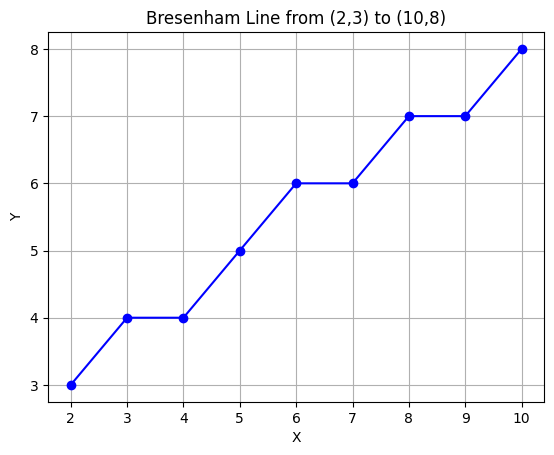

In [3]:

def bresenham(x1, y1, x2, y2):
    x_coords = []
    y_coords = []

    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    x, y = x1, y1

    sx = 1 if x2 > x1 else -1  
    sy = 1 if y2 > y1 else -1  

    if dy <= dx:  
        p = 2 * dy - dx
        for _ in range(dx + 1):
            x_coords.append(x)
            y_coords.append(y)
            if p >= 0:
                y += sy
                p -= 2 * dx
            x += sx
            p += 2 * dy
    else:  
        p = 2 * dx - dy
        for _ in range(dy + 1):
            x_coords.append(x)
            y_coords.append(y)
            if p >= 0:
                x += sx
                p -= 2 * dy
            y += sy
            p += 2 * dx

    return x_coords, y_coords

x1, y1 = 2, 3
x2, y2 = 10, 8

x_list, y_list = bresenham(x1, y1, x2, y2)

print("X coordinates:", x_list)
print("Y coordinates:", y_list)

plt.plot(x_list, y_list, marker='o', color='blue')
plt.title(f"Bresenham Line from ({x1},{y1}) to ({x2},{y2})")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


2. Draw lines for different octants and compare visually with DDA lines.

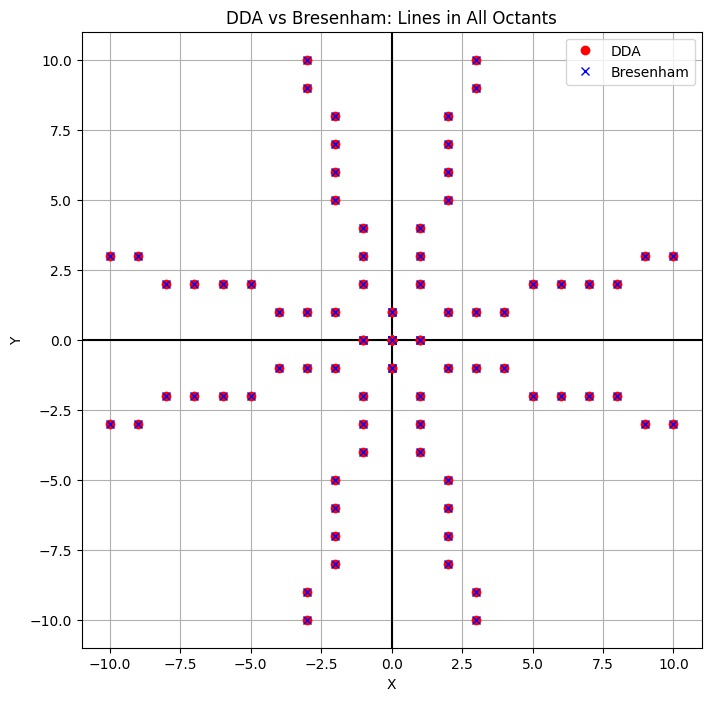

In [4]:

def dda(x1, y1, x2, y2):
    x_coords = []
    y_coords = []

    dx = x2 - x1
    dy = y2 - y1
    steps = max(abs(dx), abs(dy))
    if steps == 0:
        return [x1], [y1]

    x_inc = dx / steps
    y_inc = dy / steps
    x, y = x1, y1

    for _ in range(int(steps) + 1):
        x_coords.append(round(x))
        y_coords.append(round(y))
        x += x_inc
        y += y_inc

    return x_coords, y_coords

def bresenham(x1, y1, x2, y2):
    x_coords = []
    y_coords = []

    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    x, y = x1, y1

    sx = 1 if x2 > x1 else -1
    sy = 1 if y2 > y1 else -1

    if dy <= dx:
        p = 2 * dy - dx
        for _ in range(dx + 1):
            x_coords.append(x)
            y_coords.append(y)
            if p >= 0:
                y += sy
                p -= 2 * dx
            x += sx
            p += 2 * dy
    else:
        p = 2 * dx - dy
        for _ in range(dy + 1):
            x_coords.append(x)
            y_coords.append(y)
            if p >= 0:
                x += sx
                p -= 2 * dy
            y += sy
            p += 2 * dx

    return x_coords, y_coords

origin_x, origin_y = 0, 0
length = 10 
octant_endpoints = [
    (length, 3),     
    (3, length),    
    (-3, length),    
    (-length, 3),   
    (-length, -3),   
    (-3, -length),  
    (3, -length),    
    (length, -3)     
]

plt.figure(figsize=(8, 8))
plt.title("DDA vs Bresenham: Lines in All Octants")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.axhline(0, color='black')  # X-axis
plt.axvline(0, color='black')  # Y-axis

for i, (x2, y2) in enumerate(octant_endpoints):
    x_dda, y_dda = dda(origin_x, origin_y, x2, y2)
    plt.plot(x_dda, y_dda, marker='o', linestyle='', color='red', label='DDA' if i == 0 else "")
    x_bres, y_bres = bresenham(origin_x, origin_y, x2, y2)
    plt.plot(x_bres, y_bres, marker='x', linestyle='', color='blue', label='Bresenham' if i == 0 else "")

plt.legend()
plt.show()


3. Compare the number of integer additions and multiplications used by DDA and
Bresenham.

In [5]:

def dda_count_ops(x1, y1, x2, y2):
    x_coords = []
    y_coords = []
    
    additions = 0
    multiplications = 0

    dx = x2 - x1
    dy = y2 - y1
    steps = max(abs(dx), abs(dy))

    
    x_inc = dx / steps   
    y_inc = dy / steps   
    multiplications += 2  

    x, y = x1, y1

    for _ in range(int(steps) + 1):
        x_coords.append(round(x))
        y_coords.append(round(y))
        x += x_inc
        y += y_inc
        additions += 2  

    return x_coords, y_coords, additions, multiplications

def bresenham_count_ops(x1, y1, x2, y2):
    
    x_coords = []
    y_coords = []

    additions = 0
    multiplications = 0

    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    additions += 2  

    x, y = x1, y1
    sx = 1 if x2 > x1 else -1
    sy = 1 if y2 > y1 else -1

    if dy <= dx:
        p = 2 * dy - dx
        multiplications += 2  
        for _ in range(dx + 1):
            x_coords.append(x)
            y_coords.append(y)
            if p >= 0:
                y += sy
                additions += 1  
                p -= 2 * dx
                additions += 1  
                multiplications += 1  
            x += sx
            additions += 1  
            p += 2 * dy
            additions += 1
            multiplications += 1 
    else:
        p = 2 * dx - dy
        multiplications += 2  
        for _ in range(dy + 1):
            x_coords.append(x)
            y_coords.append(y)
            if p >= 0:
                x += sx
                additions += 1 
                p -= 2 * dy
                additions += 1
                multiplications += 1
            y += sy
            additions += 1  
            p += 2 * dx
            additions += 1
            multiplications += 1  

    return x_coords, y_coords, additions, multiplications


x1, y1 = 2, 3
x2, y2 = 10, 8


_, _, dda_add, dda_mul = dda_count_ops(x1, y1, x2, y2)


_, _, bres_add, bres_mul = bresenham_count_ops(x1, y1, x2, y2)

print(f"DDA: Additions = {dda_add}, Multiplications = {dda_mul}")
print(f"Bresenham: Additions = {bres_add}, Multiplications = {bres_mul}")


DDA: Additions = 18, Multiplications = 2
Bresenham: Additions = 32, Multiplications = 17
